Zeropadding and truncating slices in a folder so that they all can have the same number of images. (In the below code 75 is used based on the result acquired from box plot of the original data)

In [ ]:
import os
import glob
import numpy as np
import cv2
import re

def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

pth = 'D:/fiLocalDataV4/HemorrhagicStroke/'
patient_fldr = os.listdir(pth)

for i in patient_fldr:
    subfolder_path = os.path.join(pth, i, 'Scan')
    image_paths = glob.glob(os.path.join(subfolder_path, "*"))
    image_paths = sorted_alphanumeric(image_paths)
    num_images = len(image_paths)
    
    if num_images < 75:
        num_zeros_to_add = 75 - num_images
        num_zeros_to_add_beginning = num_zeros_to_add // 2
        num_zeros_to_add_end = num_zeros_to_add - num_zeros_to_add_beginning
        zero_image_path = "zero_image_placeholder.png"  # Placeholder for zero value images
        
        for _ in range(num_zeros_to_add_beginning):  # Add to the beginning
            image_paths.insert(0, zero_image_path)
        
        for _ in range(num_zeros_to_add_end):  # Add to the end
            image_paths.append(zero_image_path)
        
        print("Added", num_zeros_to_add, "zero value images to beginning and end of list")
    
    else:
        sorted_image_paths = sorted(image_paths)
        middle_index1 = num_images // 2 - 1
        middle_index2 = num_images // 2
        median = (middle_index1 + middle_index2) // 2
        
        # Keep only the 75 images centered around the median
        start_idx = median - 37  # 37 images on each side of median
        end_idx = start_idx + 75
        
        image_paths = sorted_image_paths[start_idx:end_idx]
        print(f"Keeping images from index {start_idx} to {end_idx}")
    
    # Process and save the images
    output_folder = os.path.join(pth, i, 'Processed_Images')
    os.makedirs(output_folder, exist_ok=True)
    
    for idx, image_path in enumerate(image_paths):
        if image_path == zero_image_path:
            # Create and save a zero value image
            zero_image = np.zeros((512, 512, 3), dtype=np.uint8)
            output_path = os.path.join(output_folder, f"processed_image_{idx:03d}.png")
            cv2.imwrite(output_path, zero_image)
        else:
            image = cv2.imread(image_path)  # Read the image using OpenCV
            # Process the image (add your processing logic here if needed)
            
            # Save the processed image
            output_path = os.path.join(output_folder, f"processed_image_{idx:03d}.png")
            cv2.imwrite(output_path, image)
            
print("Image processing and saving completed.")

Zeropadding by considering the maximum number of slices from all subfolders

In [ ]:
import os
import glob
import cv2
import numpy as np
import shutil

pth = 'D:/Local_Data_V4/LocalDataV4/NonStrokeabnormal/'
patient_fldr = os.listdir(pth)

# Step 1: Find the maximum number of slices among all folders
max_slices = 0
for i in patient_fldr:
    subfolder_path = os.path.join(pth, i, 'Scan')
    num_images = len(glob.glob(os.path.join(subfolder_path, "*")))
    max_slices = max(max_slices, num_images)

# Step 2: Iterate through each folder and adjust the number of slices
for i in patient_fldr:
    subfolder_path = os.path.join(pth, i, 'Scan')
    image_paths = glob.glob(os.path.join(subfolder_path, "*"))
    num_images = len(image_paths)

    try:
        if num_images < max_slices:
            num_zeros_to_add = max_slices - num_images
            for _ in range(num_zeros_to_add):
                zero_image = np.zeros((512, 512, 3), dtype=np.uint8)
                zero_image_path = os.path.join(subfolder_path, f"zero_{num_images:03d}.png")
                cv2.imwrite(zero_image_path, zero_image)
                num_images += 1

        elif num_images > max_slices:
            start_idx = (num_images - max_slices) // 2
            end_idx = start_idx + max_slices
            image_paths_to_save = image_paths[start_idx:end_idx]

            for i, path in enumerate(image_paths_to_save):
                new_path = os.path.join(subfolder_path, f"image_{i:03d}.png")
                if path != new_path:
                    shutil.move(path, new_path)

            # Remove the extra images that were not saved
            for path in image_paths[end_idx:]:
                os.remove(path)

        print("Number of images in folder:", len(glob.glob(os.path.join(subfolder_path, "*"))))
    except:
        print('not adjusted', i)

Renaming + image format conversion for mulitple images in different subfolders

In [ ]:

import cv2
import glob
import os
import re

def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(data, key=alphanum_key)

parent_dir = r"D:\Local_Data_V4\LocalDataV4\IschemicStroke"
file_path = glob.glob(os.path.join(parent_dir, '*'))
file_path = [f.replace('\\', '/') for f in file_path]
count = 0

for x in file_path:

    ffpath_0 = glob.glob(x + '/Mask/*')
    ffpath_1 = glob.glob(x + '/Scan/*')
    
    name = x.split("/")[-1]  # to split the name of the image from the format

    ffpath_0 = sorted_alphanumeric(ffpath_0)
    ffpath_0 = [f.replace('\\', '/') for f in ffpath_0]
    
    ffpath_1 = sorted_alphanumeric(ffpath_1)
    ffpath_1 = [f.replace('\\', '/') for f in ffpath_1]

    for m, s in zip(ffpath_0, ffpath_1):
        scan = x + '/Scan'
        mask = x + '/Mask'
        
        x_source = s
        y_source = m
        
        if count < 250:
            count += 1
        else:
            count = 1

        # # Adding the count to the new file name and extension
        new_mask = mask + '/m_' + str(count) + '.png'
        
        new_scan = scan + '/s_' + str(count) + '.png'
        
        print(count)
        
        # Renaming the file
        os.rename(x_source, new_scan)
        os.rename(y_source, new_mask)


Resizing images in multiple subfolders

In [ ]:

import cv2
import glob
import os
import re

def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(data, key=alphanum_key)

parent_dir = r"D:\Local_Data_V4\LocalDataV4\NonStrokeabnormal"
file_path = glob.glob(os.path.join(parent_dir, '*'))
file_path = [f.replace('\\', '/') for f in file_path]
count = 0

for x in file_path:

    ffpath_0 = glob.glob(x + '/Mask/*')
    ffpath_1 = glob.glob(x + '/Scan/*')
    
    name = x.split("/")[-1]  # to split the name of the image from the format

    ffpath_0 = sorted_alphanumeric(ffpath_0)
    ffpath_0 = [f.replace('\\', '/') for f in ffpath_0]
    
    ffpath_1 = sorted_alphanumeric(ffpath_1)
    ffpath_1 = [f.replace('\\', '/') for f in ffpath_1]

    for m, s in zip(ffpath_0, ffpath_1):
        x = cv2.imread(s)
        x = cv2.resize(x,(512,512))
        cv2.imwrite(s,x)

Image format conversion to .nii form

In [ ]:
## To convert stack of images into .nii format
import glob
import os
import SimpleITK as sitk
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

parent_dir ="D:/Local_Data_V4/LocalDataV4/NonStrokeabnormal"
final_dir = 'D:/Local_Data_V4/LDV4_1/nonstrokeabnormal'
file_path = glob.glob(os.path.join(parent_dir,'*'))
file_path = [f.replace('\\','/')for f in file_path]
for x in file_path:
    scan_pth = glob.glob(x + '/Scan/*')
    scan_pth = sorted_alphanumeric(scan_pth)
    name = x.split("/")[-1]   # to split the name of the image from the format
    
    scan_name = final_dir+ name+'.nii'
    print(scan_pth)
    
    reader_s = sitk.ImageSeriesReader()
    reader_s.SetFileNames(scan_pth)
    vol_s = reader_s.Execute()
    sitk.WriteImage(vol_s, scan_name)



Boxplot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
#import nibabel as nib
import numpy as np
#import cv2
data_dir1 =  r'D:\Local_Data_V4'
i = 0 
# Loop over all files in the directory (including files in subdirectories)
x=[]

for root, dirs, files in os.walk(data_dir1):
    #print(len(files))
    for file in files:
                
        data = len(files)
        x.append(data)
        
# print(x)

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(x)

# show plot
plt.show()

.Nii image Visuallization

(512, 512, 50, 3)


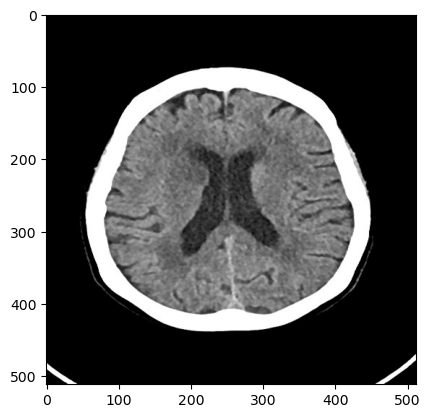

In [12]:
import nibabel as nib
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
i = '/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Ischemic/8683_12.nii'
x = nib.load(i).get_fdata()
x=np.squeeze(x,-2)
print(x.shape)
x= np.rot90(x,-1)
x = (x - np.min(x))/ (np.max(x) - np.min(x))
test = x[:,:,26]
plt.imshow(test, cmap = 'gray', vmin = 0, vmax=1)
plt.show()

To visualize multiple slices of a single .nii image

(512, 512, 50, 3)


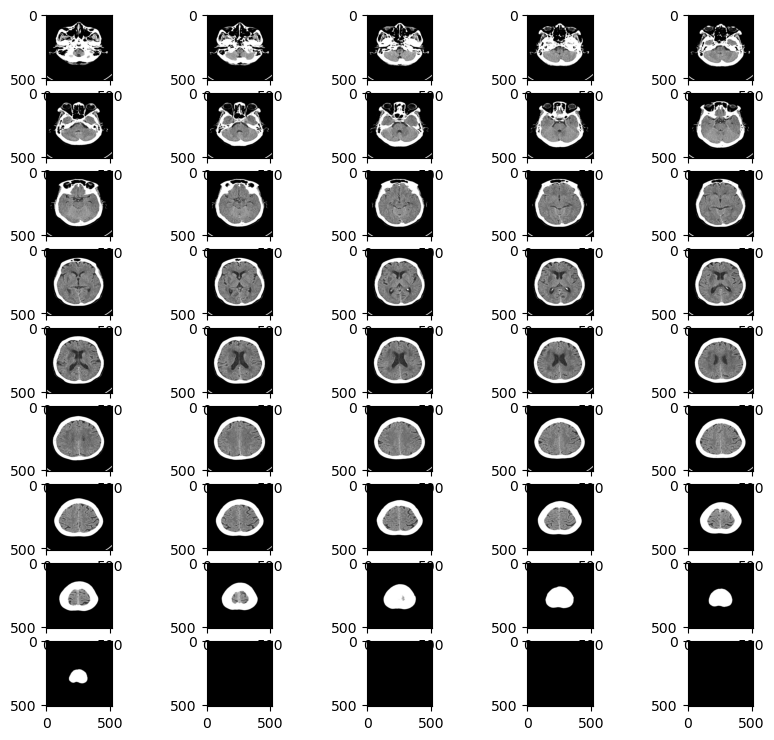

In [11]:
import nibabel as nib
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
i = '/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Ischemic/8683_12.nii'
x = nib.load(i).get_fdata()
x=np.squeeze(x,-2)
print(x.shape)
x = np.rot90(x,-1)
x = (x - np.min(x))/ (np.max(x) - np.min(x))

for i in range(45):
  plt.subplot(10,5,i+1)
  plt.imshow(x[:,:,5+i])
  plt.gcf().set_size_inches(10,10)
plt.show()

to visualize the number of images in training, validation and test from each class and to get the directory of the images

In [1]:
import os
from sklearn.model_selection import train_test_split

# Replace these paths with the actual paths to your image folders
class_folders =  ['/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Hemorrhagic','/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Ischemic/', '/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Nonstrokeabnormal/']
class_names = ['Hemorrhagic', 'Ischemic', 'Nonstrokeabnormal']

# Lists to store image paths for each class
image_paths_by_class = [[] for _ in class_folders]

# Collect image paths for each class
for idx, folder in enumerate(class_folders):
    image_paths = [os.path.join(folder, filename) for filename in os.listdir(folder)]
    image_paths_by_class[idx] = image_paths

# Split image paths into train, validation, and test sets
train_val_paths, test_paths = [], []
for paths in image_paths_by_class:
    train_paths, test_paths_single_class = train_test_split(paths, test_size=0.2, random_state=42)
    train_val_paths.extend(train_paths)
    test_paths.extend(test_paths_single_class)

train_paths, val_paths = train_test_split(train_val_paths, test_size=0.2, random_state=42)

# Print statistics and example paths
for idx, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Number of images: {len(image_paths_by_class[idx])}")
    print(f"Training images: {sum([1 for path in train_paths if class_name in path])}")
    print(f"Validation images: {sum([1 for path in val_paths if class_name in path])}")
    print(f"Test images: {sum([1 for path in test_paths if class_name in path])}")

# Print example paths for the first class
class_index = 0
print("\nExample paths for class:", class_names[class_index])
for path in train_paths:
    if class_names[class_index] in path:
        print(path)
        

Class: Hemorrhagic
Number of images: 55
Training images: 33
Validation images: 11
Test images: 11
Class: Ischemic
Number of images: 61
Training images: 38
Validation images: 10
Test images: 13
Class: Nonstrokeabnormal
Number of images: 26
Training images: 18
Validation images: 2
Test images: 6

Example paths for class: Hemorrhagic
/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Hemorrhagic/WDC_Jun_2021_031.nii
/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Hemorrhagic/WDC_Jun_2021_014.nii
/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Hemorrhagic/WDC_feb_0007.nii
/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Hemorrhagic/WDC_Jun_2021_011.nii
/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Hemorrhagic/WDC_feb_0103.nii
/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Hemorrhagic/19113_14d.nii
/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Hemorrhagic/WDC_feb_0293.nii
/home/rdadmin/Desktop/Stroke/classification/niiLDV450/Hemorrhagic/unknown.nii